In [1]:
## Declare Libraries ##

import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt

In [2]:
# Set working Directory ##

os.chdir('./Datasets/LAPD Data')

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4AC6-8CB1

 Directory of C:\Users\mmiric\Desktop\Workshop #1\Datasets\LAPD Data

01/12/2019  11:45 AM    <DIR>          .
01/12/2019  11:45 AM    <DIR>          ..
12/28/2018  10:07 PM       384,286,789 arrest-data-from-2010-to-present.csv
12/28/2018  10:07 PM       727,243,698 crime-data-from-2010-to-present.csv
12/28/2018  10:07 PM           196,244 MO_CODES_Numerical_20180627.pdf
               3 File(s)  1,111,726,731 bytes
               2 Dir(s)  121,103,781,888 bytes free


In [4]:
# Read Data #

data = pd.read_csv("./arrest-data-from-2010-to-present.csv")

In [5]:
# Explore #

data.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,101000690,2010-05-07T00:00:00,2100.0,10,West Valley,1027,19,M,H,16.0,Narcotic Drug Laws,M,11357(B)HS,POSSESS 28.5 GRAMS OR LESS OF MARIJUANA,17300 VANOWEN ST,NaN,"{'latitude': '34.1939', 'needs_recoding': Fals..."
1,101000692,2010-05-07T00:00:00,2100.0,10,West Valley,1027,19,M,W,16.0,Narcotic Drug Laws,M,11357(B)HS,POSSESS 28.5 GRAMS OR LESS OF MARIJUANA,17300 VANOWEN ST,NaN,"{'latitude': '34.1939', 'needs_recoding': Fals..."
2,101000990,2010-11-23T00:00:00,1130.0,10,West Valley,1027,52,M,H,24.0,Miscellaneous Other Violations,M,66.28LAMC,TAMPERING WITH RECYCLING OR REFUSE,16900 VOSE ST,NaN,"{'latitude': '34.1987', 'needs_recoding': Fals..."
3,101000991,2010-11-23T00:00:00,1130.0,10,West Valley,1027,62,M,H,24.0,Miscellaneous Other Violations,M,66.28LAMC,TAMPERING WITH RECYCLING OR REFUSE,16900 VOSE ST,NaN,"{'latitude': '34.1987', 'needs_recoding': Fals..."
4,101004315,2010-01-06T00:00:00,1600.0,10,West Valley,1011,40,M,H,18.0,Drunkeness,M,41.27CLAMC,DRINKING IN PUBLIC,19300 SATICOY ST,NaN,"{'latitude': '34.2084', 'needs_recoding': Fals..."


In [6]:
# See Data Size / Shape #

data.shape

(1225884, 17)

In [7]:
# Find Number of each offense #

pd.pivot_table(data, index = "Charge Group Description", values = "Report ID", aggfunc = "count").sort_values("Report ID")

,Report ID
Charge Group Description,
Federal Offenses,215
Gambling,2048
Homicide,2240
Rape,2715
Disturbing the Peace,2869
Receive Stolen Property,6337
Against Family/Child,6432
Non-Criminal Detention,6681
Forgery/Counterfeit,6697


In [8]:
data['Date'] = pd.to_datetime(data["Arrest Date"], errors = 'coerce').dt.year

GRAPH = pd.pivot_table(data, index = ["Charge Group Description", "Date"], values = "Report ID", aggfunc = "count").sort_values("Report ID")
GRAPH = GRAPH.reset_index()

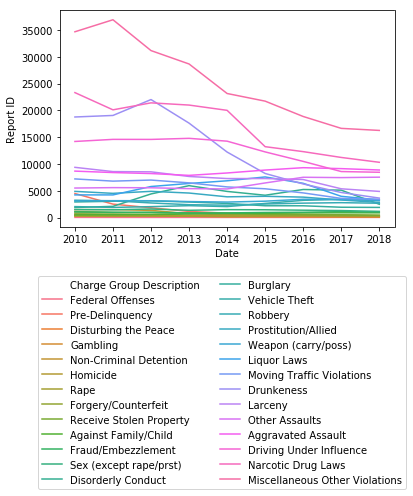

In [9]:
# Not a beautiful graph for a number of reasons # 

import seaborn as sns

p =sns.lineplot(data = GRAPH, x = "Date", y = "Report ID", hue = "Charge Group Description")

p.legend(ncol = 2, loc = 0, bbox_to_anchor=(1.05, -0.2))

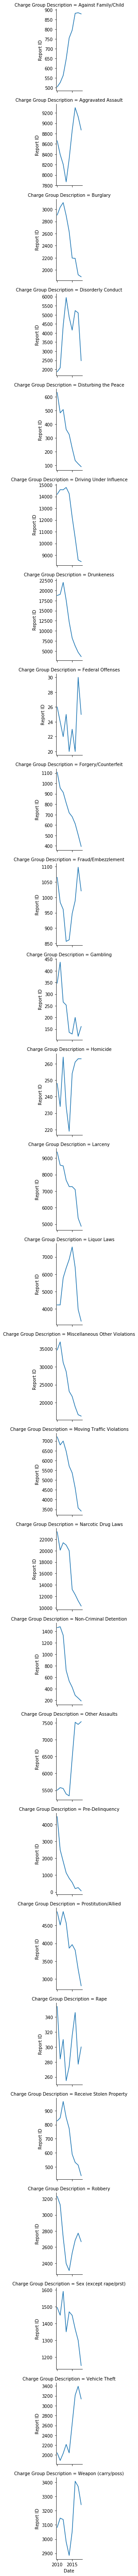

In [10]:
g = sns.FacetGrid(data = GRAPH.sort_values(by =["Charge Group Description", "Date"]), col = "Charge Group Description", col_wrap = 1, sharey = False)
g = g.map(plt.plot, "Date", "Report ID")
plt.show()